In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy import modeling
from scipy.optimize import curve_fit
from astropy import wcs
from ROHSApy import ROHSA


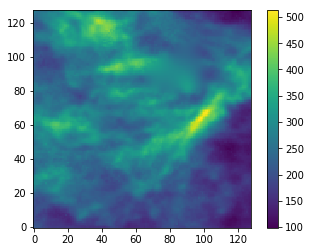

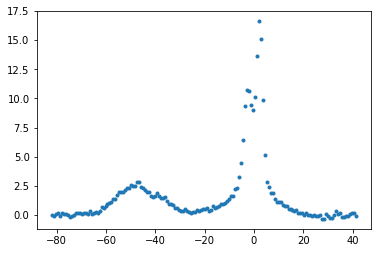

(154, 128, 128)
(154, 128, 128)


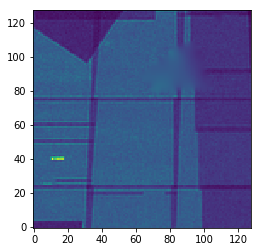

In [6]:
fitsname = "GHIGLS_NCPL_Tb_INPAINTED_UNCUT.fits"
hdu = fits.open(fitsname)
hdr = hdu[0].header

hdr['CRPIX1'] -= 197
hdr['CRPIX2'] -= 246
hdr['CRPIX3'] -= 215


cube = hdu[0].data[0][215:369,246:374, 197:325]
#cube = cube[:, :32, :32]

rms = hdu[2].data[246:374,197:325]
#rms = rms[:32, :32]
#print(rms.shape)
plt.imshow(np.sum(cube, 0), origin = 'lower')
plt.colorbar()
plt.show()
#print(rms[15,15])

CRVAL = hdr['CRVAL3']
CDELT = hdr['CDELT3']
CRPIX = hdr['CRPIX3']

ind_array = np.arange(cube.shape[0])

v = (CRVAL + CDELT*((ind_array) - CRPIX))/1000

plt.plot(v, cube[:,15,15], linestyle = "none", marker = '.')
plt.show()

noise1 = rms*(1+(cube/20))
plt.imshow(rms, origin = 'lower')

print(np.shape(cube))
print(np.shape(noise1))

(154, 128, 128)
(154, 128, 128)
Generate GHIGLS_UMA_Tb.dat file readable by fortran
Generate GHIGLS_NCPL_Tb_RMS_3-D_0.dat file readable by fortran
Generate parameters.txt file
 -------------------------------------------------------------------------
20 December 2020   6:54:06.470 PM
 
   ____     ___    _   _   ____       _    
  |  _ \   / _ \  | | | | / ___|     / \   
  | |_) | | | | | | |_| | \___ \    / _ \  
  |  _ <  | |_| | |  _  |  ___) |  / ___ \ 
  |_| \_\  \___/  |_| |_| |____/  /_/   \_\ 
 
  Version 1.2.1
  ROHSA is released as open source code
  Check out the documentation: https://antoinemarchal.github.io/ROHSA/
 
 run: ./ROHSA parameters.txt
 -------------------------------------------------------------------------
 filename = 'GHIGLS_UMA_Tb.dat'
 fileout = 'GHIGLS_UMA_Tb_INPAINTED_gauss_run_fullcube_0.dat'
 timeout = 'timestep.dat'
  
 ______Parameters_____
 n_gauss =           20
 n_gauss_add =            0
 lambda_amp =    10.000000000000000     
 lambda_mu =    10

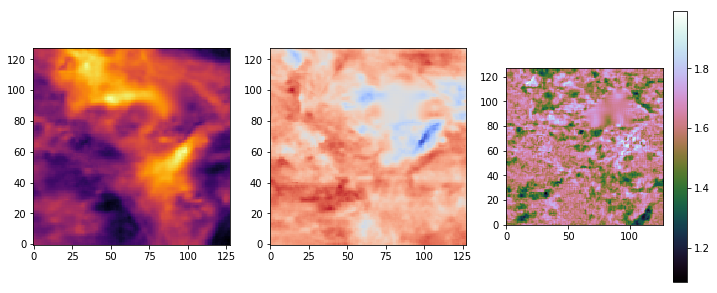

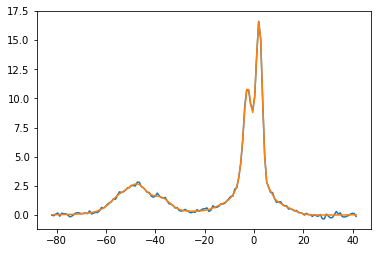

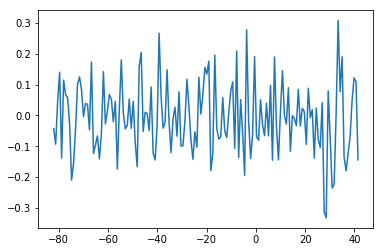

140.01937063329996
1.4895677726946803


In [9]:
filename = "GHIGLS_UMA_Tb.dat" #@param
fileout = "GHIGLS_UMA_Tb_INPAINTED_gauss_run_fullcube_0.dat" #@param
filename_noise = 'GHIGLS_NCPL_Tb_RMS_3-D_0.dat'
n_gauss = 20          #@param {type:"slider", min:1, max:12, step:1}                                                                                                                                                                                                                             

lambda_amp = 10 #@param {type:"slider", min:0, max:1000, step:1}
lambda_mu = 10       #@param {type:"slider", min:0, max:1000, step:1}
lambda_sig = 20      #@param {type:"slider", min:0, max:1000, step:1}                                                                                                                                                                                                                                                        
lambda_var_sig = 100.   #@param {type:"slider", min:0, max:10000, step:1} 

amp_fact_init = 0.66  # times max amplitude of additional Gaussian                                                                                                                                                                                                                                                          
sig_init = 4.         # dispersion of additional Gaussian                                                                                                                                                                                                                                                                   
init_option = 'mean'  # init ROHSA with the mean or the std spectrum                                                                                                                                                                                                                                                      
maxiter_init = 15000  # max iteration for L-BFGS-B alogorithm init mean                                                                                                                                                                                                                                        
maxiter = 400         #@param {type:"slider", min:1, max:800, step:1}                                                                                                                                                                                                                                                         
m = 10                # number of corrections used in the limited memory matrix                                                                                                                                                                                                                               
noise = ".true."     # if false - STD map computed by ROHSA with lstd and ustd                                                                                                                                                                                                           
regul = ".true."      # if true - activate regulation                                                                                                                                                                                                                                                                 
descent = ".true."    #@param [".true.", ".false."]                                                                                                                                                                                                                       
lstd = 1              #@param {type:"slider", min:1, max:400, step:1}                                                                                                                                                                                                                
ustd = 20             #@param {type:"slider", min:1, max:400, step:1}                                                                                                                                                                                                                 

######################################
lb_sig_init =  1.0
ub_sig_init =  10.

lb_sig =  1.
ub_sig =  100.0
#######################################


iprint = -1           #@param ["-1", "0", "1"]                                                                                                                                                                                                                                                                                      
iprint_init = -1      # print option init                                              
save_grid = ".false." #@param [".true.", ".false."] 

print(np.shape(noise1))
print(np.shape(cube))

core = ROHSA(cube, hdr=hdr) 
core.cube2dat(filename=filename)
core1 = ROHSA(noise1, hdr=hdr)
core1.cube2dat(filename= filename_noise)
core.gen_parameters(filename=filename, 
                    fileout=fileout, 
                    sig_init = sig_init,
                    lb_sig_init = lb_sig_init,
                    ub_sig_init = ub_sig_init,
                    lb_sig = lb_sig,
                    ub_sig = ub_sig,
                    filename_noise=  filename_noise,
                    noise = noise,
                    n_gauss=n_gauss,
                    lambda_amp=lambda_amp,
                    lambda_mu=lambda_mu,
                    lambda_sig=lambda_sig,
                    lambda_var_sig=lambda_var_sig,
                    maxiter=maxiter,
                    descent=descent,
                    lstd=lstd,
                    ustd=ustd,
                    iprint=iprint,
                    save_grid=save_grid)

!./ROHSA/src/ROHSA parameters.txt

gaussian = core.read_gaussian("GHIGLS_UMA_Tb_INPAINTED_gauss_run_fullcube_0.dat")
print("dim cube = " + str(gaussian.shape))

model = core.return_result_cube(gaussian=gaussian)

amplitude = gaussian[0::3]
position = gaussian[1::3]
dispersion = gaussian[2::3]

integral = amplitude * dispersion

plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.imshow(amplitude[0], origin="lower", cmap="inferno")
plt.subplot(1,3,2)
plt.imshow(position[0], origin="lower", cmap="coolwarm")
plt.subplot(1,3,3)
plt.imshow(dispersion[0], origin="lower", cmap="cubehelix")
plt.colorbar()
plt.show()

plt.plot(core.v, cube[:,15,15])
plt.plot(core.v, model[:,15,15])
plt.show()

residual = cube[:,15,15] - model[:,15,15]
plt.plot(core.v, residual)
plt.show()


noise = rms[15,15]*(1+(cube[:,15,15]/20))
chi2 = np.sum(residual**2/noise**2)
print(chi2)

dim = len(core.v)
rd_chi2 = chi2 / (dim-(3*n_gauss))
print(rd_chi2)

In [17]:
from scipy import ndimage
kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]]) / 4.
conv = ndimage.convolve(position[0], kernel, mode='reflect')


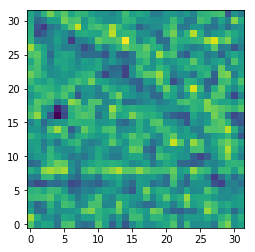

In [18]:
plt.imshow(conv, origin = 'lower')

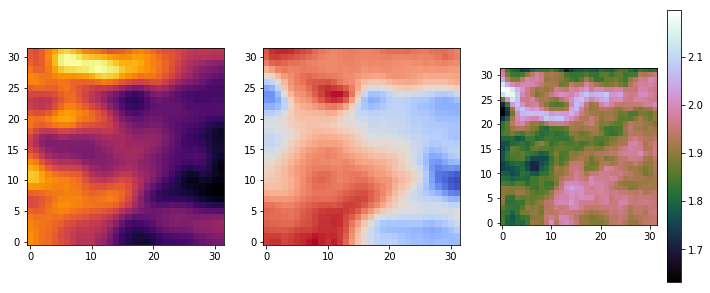

In [8]:
plt.figure(figsize=(12,5))
plt.subplot(1,3,1)
plt.imshow(amplitude[2]*dispersion[2], origin="lower", cmap="inferno")
plt.subplot(1,3,2)
plt.imshow(position[2], origin="lower", cmap="coolwarm")
plt.subplot(1,3,3)
plt.imshow(dispersion[2], origin="lower", cmap="cubehelix")
plt.colorbar()
plt.show()

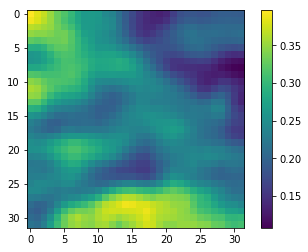

In [13]:
plt.imshow((amplitude[2]*dispersion[2])/((amplitude[0]*dispersion[0]) + (amplitude[2]*dispersion[2])))
plt.colorbar()